<a href="https://colab.research.google.com/github/MeghaBharti/Deep_Learning/blob/main/Basic/tower_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How can we create a tower shape using two sigmoid functions?

Can we create a tower shape using only a single sigmoid function?

No, a single sigmoid function cannot create a tower shape because it is a smooth, S-shaped curve that transitions gradually from 0 to 1.

However, by subtracting two sigmoid functions with different biases, we can create a bump or tower-like shape. This works because:
  *   One sigmoid function creates a rising edge.
  *   The other sigmoid function (shifted) creates a falling edge.
  *   Their difference forms a plateau (tower) in between.








<ipython-input-11-3c3d084da7a9>:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


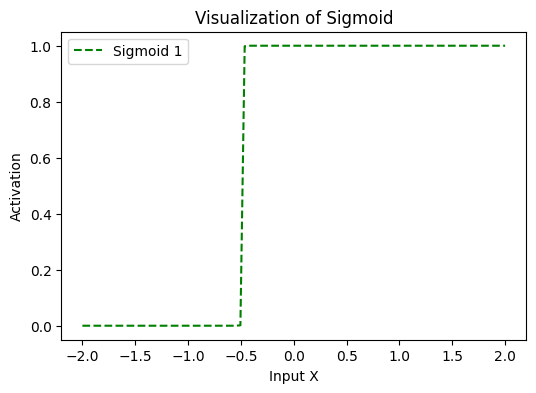

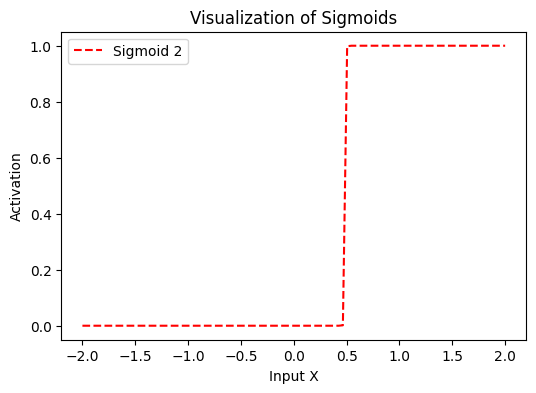

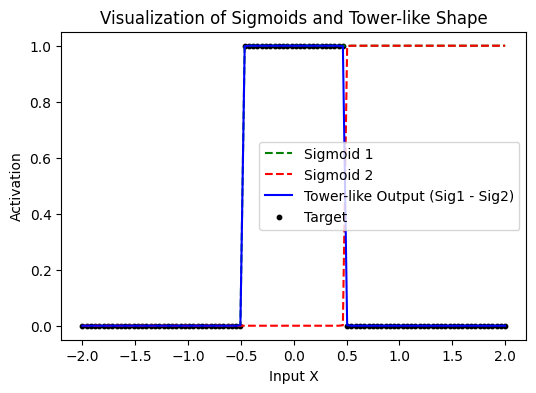

Optimized Parameters: w1=316.62, b1=-0.48, w2=316.62, b2=0.49


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tower_nn(x, w1, b1, w2, b2):
    """
    Creating a tower-like shape by subtracting two sigmoid functions,
    with weights (w) and biases (b) as parameters.
    """
    sig1 = sigmoid(w1 * (x - b1))
    sig2 = sigmoid(w2 * (x - b2))
    return sig1, sig2, sig1 - sig2

def loss(params, x, target):
    """Mean squared error loss function."""
    w1, b1, w2, b2 = params
    _, _, pred = tower_nn(x, w1, b1, w2, b2)
    return np.mean((pred - target) ** 2)

# Generate training data
x_vals = np.linspace(-2, 2, 100)
target_vals = np.where((x_vals > -0.5) & (x_vals < 0.5), 1, 0)  # Ideal tower shape

# Initialize parameters
initial_params = [10, -0.5, 10, 0.5]

# Optimize weights and biases
result = minimize(loss, initial_params, args=(x_vals, target_vals), method='L-BFGS-B')
optimized_w1, optimized_b1, optimized_w2, optimized_b2 = result.x

# Generate optimized output
sig1_vals, sig2_vals, y_vals = tower_nn(x_vals, optimized_w1, optimized_b1, optimized_w2, optimized_b2)

# Plot the individual first sigmoids
plt.figure(figsize=(6, 4))
plt.plot(x_vals, sig1_vals, label='Sigmoid 1', linestyle='dashed', color='g')
plt.xlabel('Input X')
plt.ylabel('Activation')
plt.title('Visualization of Sigmoid')
plt.legend()
plt.show()

# Plot the individual second sigmoids
plt.figure(figsize=(6, 4))
plt.plot(x_vals, sig2_vals, label='Sigmoid 2', linestyle='dashed', color='r')
plt.xlabel('Input X')
plt.ylabel('Activation')
plt.title('Visualization of Sigmoids')
plt.legend()
plt.show()

# Plot the individual sigmoids and final output
plt.figure(figsize=(6, 4))
plt.plot(x_vals, sig1_vals, label='Sigmoid 1', linestyle='dashed', color='g')
plt.plot(x_vals, sig2_vals, label='Sigmoid 2', linestyle='dashed', color='r')
plt.plot(x_vals, y_vals, label='Tower-like Output (Sig1 - Sig2)', color='b')
plt.scatter(x_vals, target_vals, label='Target', color='black', s=10)
plt.xlabel('Input X')
plt.ylabel('Activation')
plt.title('Visualization of Sigmoids and Tower-like Shape')
plt.legend()
plt.show()

# Print optimized parameters
print(f"Optimized Parameters: w1={optimized_w1:.2f}, b1={optimized_b1:.2f}, w2={optimized_w2:.2f}, b2={optimized_b2:.2f}")
